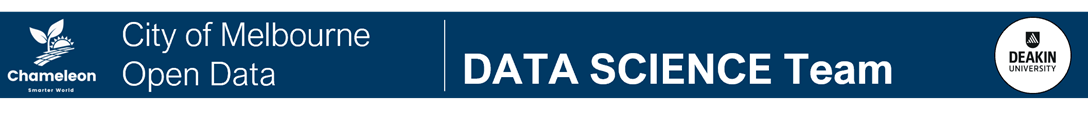


# **HOUSING PRICES, LANDMARKS AND PLACES OF INTEREST**


<div class="usecase-title">Relationship between cost of housing and amenities of a suburb</div>

<div class="usecase-authors"><b>Authored by: Yash K Daware and Vaibhavi J Deo </b></div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Numpy, Pandas, Seaborn, Plotly, Folium</div>
</div>

<div class="usecase-section-header">Scenario</div>


**Scenario 1: New Home Buyer's Perspective**

As a prospective homebuyer in Suburb X, understanding the factors influencing property prices is crucial. By analyzing amenities like hospitals, places of worship, and shopping centers, along with property prices, buyers can make informed decisions. Data analysis reveals that Suburb X's higher property prices are linked to its quality amenities. This insight will help buyers assess the value of properties in the area.

**Scenario 2: Builder's Perspective**

Builders planning projects in Suburb Y analyze market dynamics and amenities' impact on property demand. By studying recent sales and amenities like hospitals and shopping centers, builders identify prime locations for development. Insights gained help tailor projects to meet buyer preferences, maximizing success and profitability.

**Scenario 3: Council's Perspective**

Local councils overseeing Suburb Z can use an analysis like this to enhance its appeal and livability. Through data analysis and stakeholder engagement, council can assess existing amenities and identify areas for improvement. Strategic initiatives, such as infrastructure investments and public-private partnerships, boost Suburb Z's attractiveness and stimulate economic development.

<div class="usecase-section-header">In this usecase we intend to understand what impact does the amenities of a suburb such as hospitals, places of worship, shopping centres, tourist attractions have on the housing market of the suburb.</div>

For the usecase, we will be doing correlation analysis and regression analysis, I will begin by analyzing property data to explore how prices vary across different suburbs. Next, I will examine the number and Types of landmarks present in each area to determine if their presence correlates with variations in median property prices.

The primary objective is to investigate whether the quantity and nature of landmarks have an impact on property prices. By conducting this analysis, I aim to identify which Types of landmarks, if any, significantly influence property prices. This initial investigation will provide insights into the relationship between landmarks and property values within the studied suburb.

This can help home buyers in understanding how the property prices are driven by the landmarks present in the suburb of their choice, can help real estate agents to do market segmentation and be able to better serve their clients in their budgets and amenety preferences. Can also aid builders in projecting the outcomes of the projects in each area. Also shall help Councils to understand what measures to take to make the area more liveable and identifies areas of improvement.



---

# Importing Libraries


In [209]:
import requests
import numpy as np
import pandas as pd

import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import plotly.graph_objects as go

from scipy.stats import zscore

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the  [House Prices by Small Area](https://https://data.melbourne.vic.gov.au/explore/dataset/house-prices-by-small-area-sale-year/table/) Dataset

In [210]:
# Function to get data from website using API
def get_data(base, data_url, offset=0):
    # Set the filters, limit retrieves 20 rows at a time, offset says where to start data collection
    filters = f'records?limit={50}&offset={offset}&timezone=UTC'
    # Make the url from base, data url and filters variables stored ouside loop
    url = f'{base}{data_url}/{filters}'
    # Use the requests function to get the data
    result = requests.get(url)
    # Check that the request works, error code 200 = successful
    if result.status_code == 200:
        # Save results as a json file
        result_json = result.json()
        # Store a variable of max_results with total of dataset
        max_results = result_json['total_count']
        # Save the results key data to a list variable
        records = result_json['results']
    else:
        # If data is not collected correctly return the error
        print("ERROR GETTING DATA: ", result.status_code)
        max_results = 0
        records = []
    # At end of function, return the json results in records, max_results count and offset
    return [records, max_results, offset]



# Collect data from API
# Set offset increment
# (needs to match offset in get data function)
OFFSET_INCREMENT = 50
# Base url (this should be the same for all datasets)
BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# Set specific url
# (change this variable for the dataset you are working with)
SPECIFIC_PATH = 'house-prices-by-small-area-sale-year'
# Call the get data function, passing in variables above, save to result
result = get_data(BASE_URL, SPECIFIC_PATH)
# Save the records data returned in the get_data function to records list variable
records = result[0]
# Save the dataset size data returned in the get_data function to max_results variable
max_results = result[1]
# Increase the offset returned in the get_data function (result[2]) by the offset increment
offset = result[2] + OFFSET_INCREMENT
# Check the length of the data returned and compare it against the max_results variable
# If the length o fthe data is less than the max_results, run the while loop
while len(records) != max_results:
    # Call the get data function again, passing in url, specific path and new offset value
    data = get_data(BASE_URL, SPECIFIC_PATH, offset)
    # Add the data collected to the existing records list
    records += data[0]
    # Increase the offset by the offset increment
    offset += OFFSET_INCREMENT
# Convert the records list of dictionaries into a pandas dataframe
house_price = pd.DataFrame(records)
house_price['Transaction_Count'] = house_price.pop('transaction_count')


housing_data= house_price

In [211]:
house_price = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/house-prices-by-small-area-sale-year/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C")

In [212]:
housing_data= house_price
house_price.head(10)

,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42
3,2000,East Melbourne,Residential Apartment,295000.0,139
4,2000,Kensington,House/Townhouse,215250.0,258
5,2000,Melbourne (CBD),House/Townhouse,NaN,3
6,2000,Melbourne (CBD),Residential Apartment,276000.0,1065
7,2000,Melbourne (Remainder),Residential Apartment,284500.0,57
8,2000,North Melbourne,House/Townhouse,280000.0,115
9,2000,Parkville,Residential Apartment,231300.0,168


**For the given Dataset we observe the shape and Data Type for each column To Know more about the data we are dealing with**

In [213]:
# Displaying shape
print("Shape of the dataset:")
print(housing_data.shape)

# Displaying data Types
print("\nData Types of the dataset:")
print(housing_data.dtypes)

Shape of the dataset:
(347, 5)

Data Types of the dataset:
Sale_Year              int64
Small_Area            object
Type                  object
Median_Price         float64
Transaction_Count      int64
dtype: object


**Cleaning the data by eliminating null values.**

In [214]:
#Finding null and Zero values
null_values = housing_data.isnull().sum()

zero_values = (housing_data == 0).sum()

print("Null values:")
print(null_values)

print("\nZero values:")
print(zero_values)

Null values:
Sale_Year             0
Small_Area            7
Type                  0
Median_Price         28
Transaction_Count     0
dtype: int64

Zero values:
Sale_Year            0
Small_Area           0
Type                 0
Median_Price         5
Transaction_Count    0
dtype: int64


**Cleaning the House Prices dataset and displaying a cleaned version of the dataset.**

In [215]:

# Dropping rows with NaN, 0, or NA values
housing_price = house_price.dropna(axis=0, how='any')
housing_price = housing_price.replace(0, pd.NA).dropna()
housing_price = housing_price[housing_price['Median_Price'] >= 100000].reset_index(drop=True)


print("Cleaned dataset shape:", housing_price.shape)
print("\n Cleaned data:")
housing_price



Cleaned dataset shape: (310, 5)

 Cleaned data:


,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42
3,2000,East Melbourne,Residential Apartment,295000.0,139
4,2000,Kensington,House/Townhouse,215250.0,258
...,...,...,...,...,...
305,2016,North Melbourne,Residential Apartment,515000.0,231
306,2016,Parkville,House/Townhouse,1761250.0,32
307,2016,Parkville,Residential Apartment,500000.0,63
308,2016,South Yarra,House/Townhouse,2135000.0,34


**Cleaning the dataset by eliminating the extreme values that may skew the data.**

In [216]:
import numpy as np

# Calculate the 1st and 99th percentiles of 'Median_Price'
price_1st_percentile = housing_price['Median_Price'].quantile(0.01)
price_99th_percentile = housing_price['Median_Price'].quantile(0.99)

# Filter out the extreme values based on percentiles
housing_price = housing_price[(housing_price['Median_Price'] <= price_99th_percentile)].reset_index(drop=True)


print("Cleaned dataset shape:", housing_price.shape)
print("\n Cleaned data:")
housing_price



Cleaned dataset shape: (306, 5)

 Cleaned data:


,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42
3,2000,East Melbourne,Residential Apartment,295000.0,139
4,2000,Kensington,House/Townhouse,215250.0,258
...,...,...,...,...,...
301,2016,North Melbourne,Residential Apartment,515000.0,231
302,2016,Parkville,House/Townhouse,1761250.0,32
303,2016,Parkville,Residential Apartment,500000.0,63
304,2016,South Yarra,House/Townhouse,2135000.0,34


# Number of Transactions that took place each year

In [217]:
import plotly.graph_objects as go

# Grouping the data
transaction_counts = housing_price.groupby('Sale_Year')['Transaction_Count'].sum()

# Calculating the average transaction count per year
average_transaction_count = transaction_counts.mean()

# Creating a bar plot
fig = go.Figure(data=[go.Bar(x=transaction_counts.index, y=transaction_counts.values)])

# Adding a horizontal line for the average transaction count
fig.add_shape(type='line',
              x0=min(transaction_counts.index), y0=average_transaction_count,
              x1=max(transaction_counts.index), y1=average_transaction_count,
              line=dict(color='red', width=2, dash='dash'),
              name=f'Average ({average_transaction_count:.2f} transactions/year)')

fig.update_layout(
    title='Number of Transactions Each Year',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Transaction Count'),
)

fig.show()


**From the above bar plot we can observe the trends of number of transactions over the years, we have also represented the average number of traansactions each year by a dotted red line. This helps us observe which years had an above average number of Housing transactions taking place. We can observe that the period between 2009 to 2014 we had an increase in the number of transactions as compared to the average. Later, we would observe if this was also true or not for each suburb.**

# Listing The Suburbs in the Dataset

**Finding out the suburbs for which we have the Housing prices data in the House Prices by Small Area dataset.**

In [218]:
# Listing the Suburbs
unique_Small_Areas = housing_price['Small_Area'].unique()

print("Separate elements:")
for area in unique_Small_Areas:
    print(area)


Separate elements:
Carlton
East Melbourne
Kensington
Melbourne (CBD)
Melbourne (Remainder)
North Melbourne
Parkville
South Yarra
West Melbourne (Residential)
Southbank
Docklands




---


# Grouping data from the same suburbs together


In [219]:

suburb_groups = housing_price.groupby('Small_Area')
suburb_datasets = {}  # Initialize an empty dictionary to store datasets for each suburb

for suburb, data in suburb_groups:
    suburb_datasets[suburb] = data.copy()  # Store the dataset for the current suburb in the dictionary

# Now suburb_datasets is a dictionary where each key is a suburb name and each value is the corresponding dataset.

suburb_datasets['Docklands']



,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
51,2007,Docklands,Residential Apartment,565000.0,653
76,2010,Docklands,House/Townhouse,1450000.0,57
77,2010,Docklands,Residential Apartment,610000.0,851
85,2011,Docklands,Residential Apartment,604450.0,772
95,2012,Docklands,House/Townhouse,1900000.0,12
111,2014,Docklands,House/Townhouse,895000.0,12
112,2014,Docklands,Residential Apartment,580000.0,1098
119,2015,Docklands,House/Townhouse,1880000.0,11
120,2015,Docklands,Residential Apartment,576500.0,608
132,2016,Docklands,Residential Apartment,591000.0,371




---


# Plotting Median Price of Houses from all the Suburbs with respect to the year in which the House was sold.

In [220]:
import plotly.graph_objects as go
import numpy as np

for suburb_name in unique_Small_Areas:
    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    # Create figure
    fig = go.Figure()

    # Add bar trace for Median_Price against Sale_Year with custom color
    fig.add_trace(go.Bar(x=dataset['Sale_Year'],
                         y=dataset['Median_Price'],
                         marker=dict(color='rgb(135, 16, 100)')))  # Custom color

    # Update layout
    fig.update_layout(title=f'Housing Price in {suburb_name} Over the Years',
                      xaxis_title='Sale Year',
                      yaxis_title='Median Price',
                      xaxis=dict(tickmode='linear'),
                      yaxis=dict(tickformat='$,'))

    # Show interactive plot
    fig.show()








---


# Median Price of Houses in each Suburb

In [221]:

# Create an empty dictionary to store median of median prices for each suburb
median_of_suburbs = {}

# Iterate over each suburb in the unique_Small_Areas list
for suburb_name in unique_Small_Areas:
    # Select the dataset for the current suburb and sort it by 'Sale_Year'
    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    # Calculate the median of the 'Median_Price' column for the current suburb
    sub_Median_Price = np.median(dataset['Median_Price'])

    # Store the result in the dictionary with suburb name as key
    median_of_suburbs[suburb_name] = sub_Median_Price

# Print the median of median prices for each suburb
for suburb_name, median in median_of_suburbs.items():
    print(f" Median Price of Housing in {suburb_name}: {median}")


 Median Price of Housing in Carlton: 452500.0
 Median Price of Housing in East Melbourne: 663750.0
 Median Price of Housing in Kensington: 415000.0
 Median Price of Housing in Melbourne (CBD): 378000.0
 Median Price of Housing in Melbourne (Remainder): 500000.0
 Median Price of Housing in North Melbourne: 431125.0
 Median Price of Housing in Parkville: 516000.0
 Median Price of Housing in South Yarra: 651000.0
 Median Price of Housing in West Melbourne (Residential): 454500.0
 Median Price of Housing in Southbank: 494400.0
 Median Price of Housing in Docklands: 580000.0


# Median Price of Housing in each Suburb

In [222]:
import plotly.graph_objects as go
Median_Price_df = pd.DataFrame({'Suburb': list(median_of_suburbs.keys()),
                                'Median_Price': list(median_of_suburbs.values())})
# Sort the DataFrame by Median_Price
Median_Price_df = Median_Price_df.sort_values(by='Median_Price')

# Create an interactive line chart with markers
fig = go.Figure()

fig.add_trace(go.Scatter(x=Median_Price_df['Suburb'],
                         y=Median_Price_df['Median_Price'],
                         mode='lines+markers'))

# Update layout
fig.update_layout(title='Median Price of Housing in each Suburb',
                  xaxis_title='Suburb',
                  yaxis_title='Median Price',
                  xaxis=dict(tickangle=45),
                  yaxis=dict(tickformat='$,.0f'),
                  plot_bgcolor='lightgrey')

# Show interactive plot
fig.show()


In [223]:

# Create an empty dictionary to store median of median prices for each suburb
mean_of_suburbs = {}

# Iterate over each suburb in the unique_Small_Areas list
for suburb_name in unique_Small_Areas:
    # Select the dataset for the current suburb and sort it by 'Sale_Year'
    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    # Calculate the median of the 'Median_Price' column for the current suburb
    sub_mean_price = np.mean(dataset['Median_Price'])

    # Store the result in the dictionary with suburb name as key
    mean_of_suburbs[suburb_name] = sub_mean_price



In [224]:
import plotly.graph_objects as go
mean_price_df = pd.DataFrame({'Suburb': list(mean_of_suburbs.keys()),
                                'Mean_Price': list(mean_of_suburbs.values())})
# Sort the DataFrame by Median_Price
mean_price_df = mean_price_df.sort_values(by='Mean_Price')

# Create an interactive line chart with markers
fig = go.Figure()

fig.add_trace(go.Scatter(x=mean_price_df['Suburb'],
                         y=mean_price_df['Mean_Price'],
                         mode='lines+markers'))

# Update layout
fig.update_layout(title='Mean Price of Housing in each Suburb',
                  xaxis_title='Suburb',
                  yaxis_title='Mean Price',
                  xaxis=dict(tickangle=45),
                  yaxis=dict(tickformat='$,.0f'),
                  plot_bgcolor='lightgrey')

# Show interactive plot

# Number of Property Transactions in each suburb over the years

**In the following section we obsereve the trend of number of property transactions in each suburb, for every suburb we have highlighted the average number of transactions by a dotted red line.**

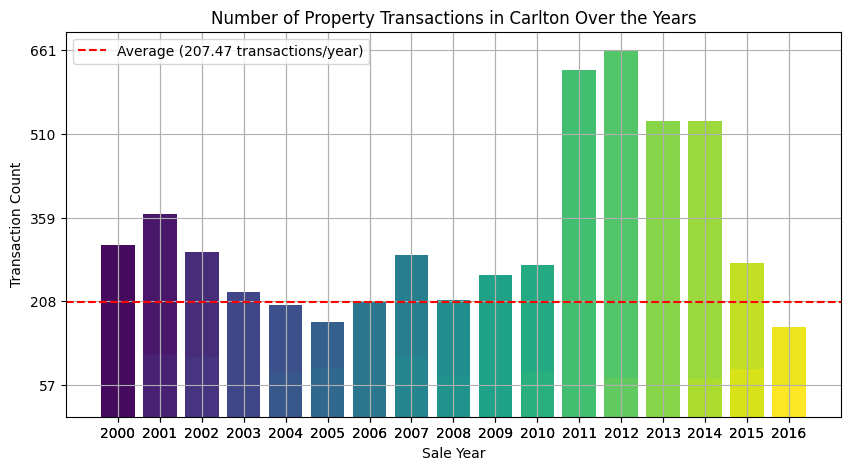

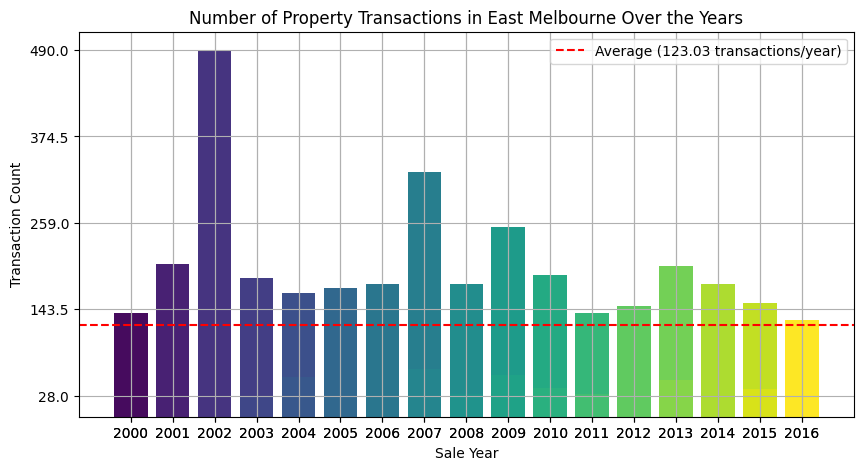

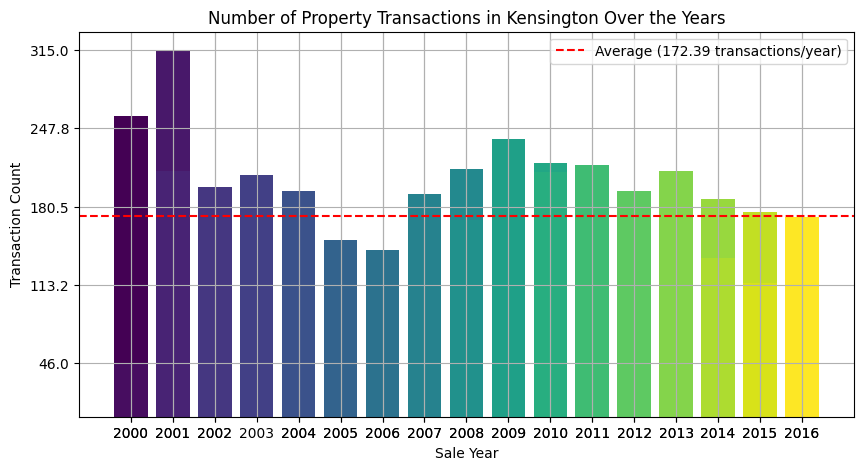

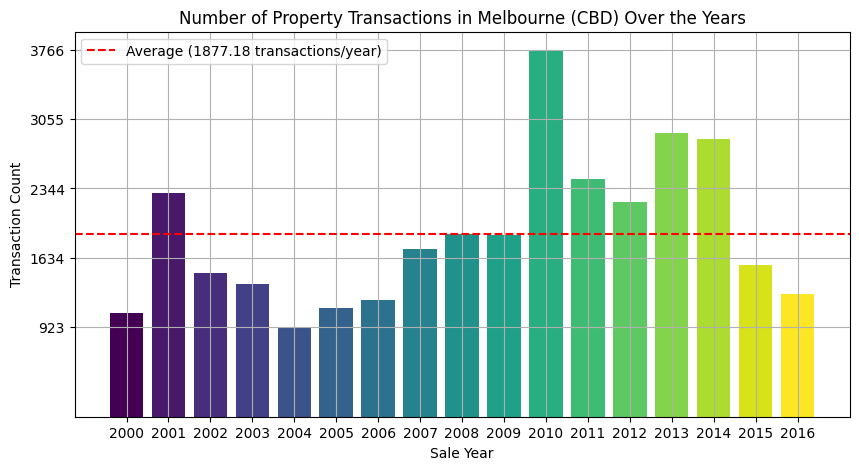

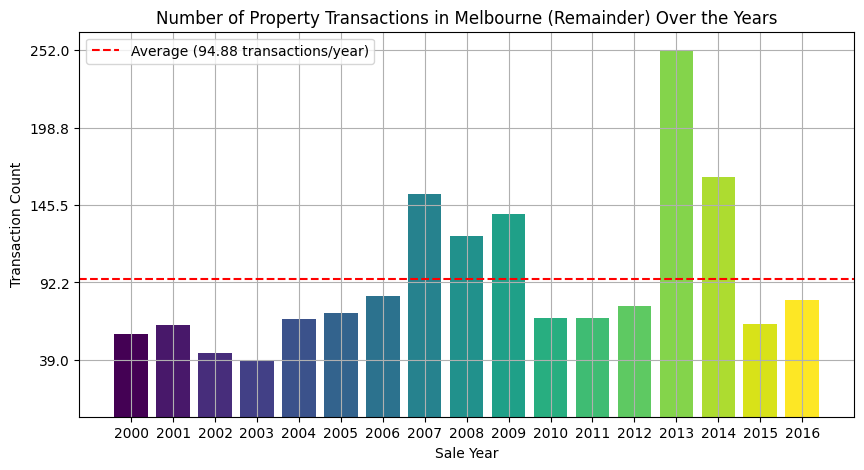

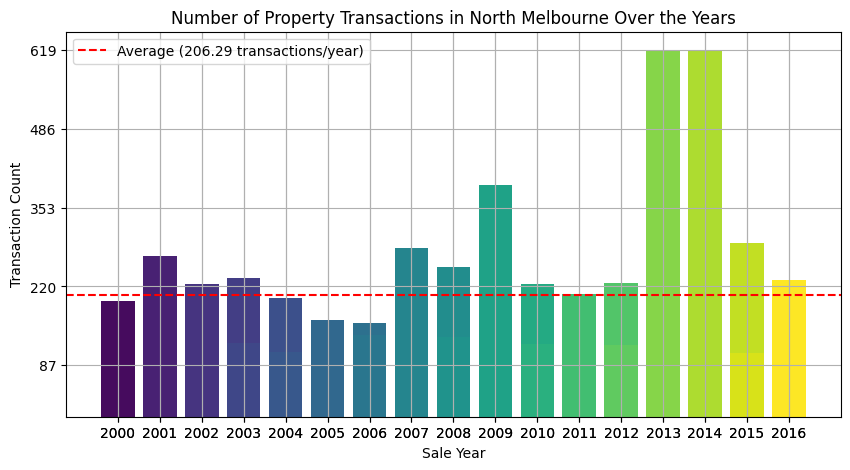

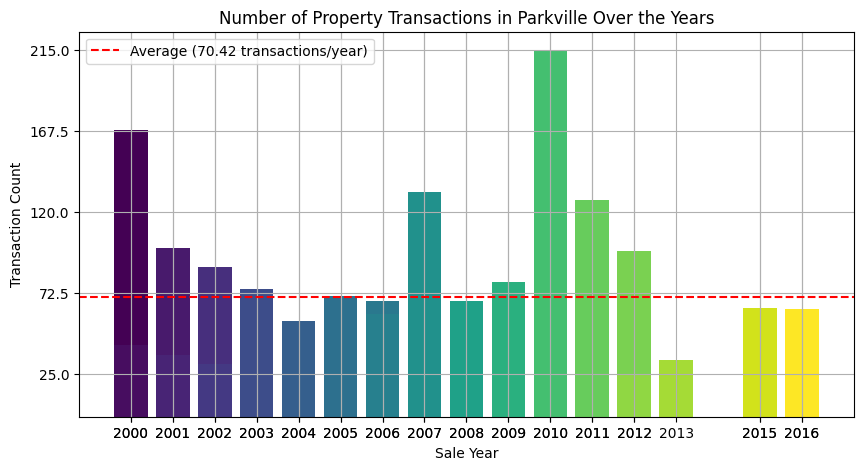

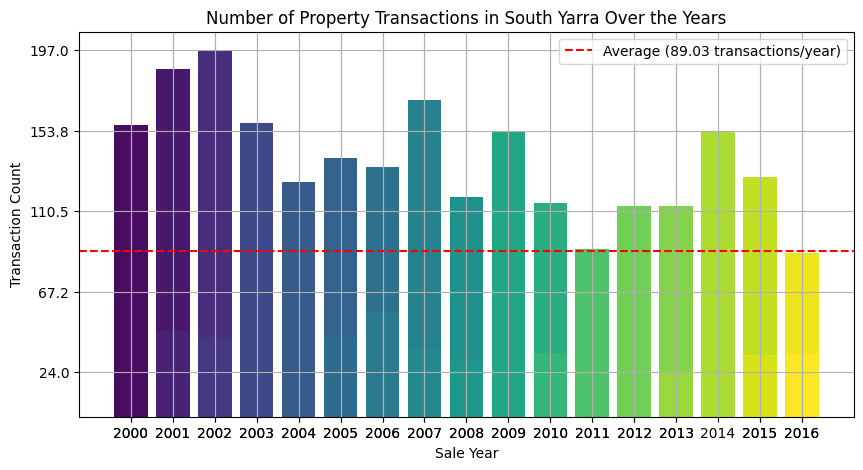

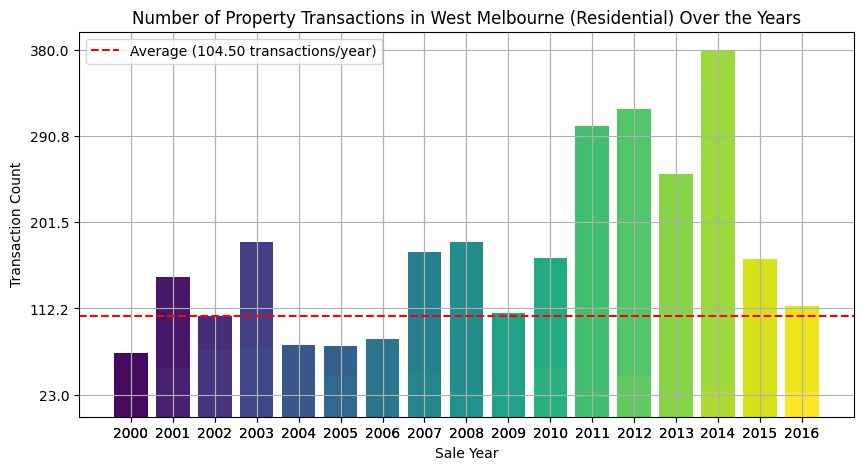

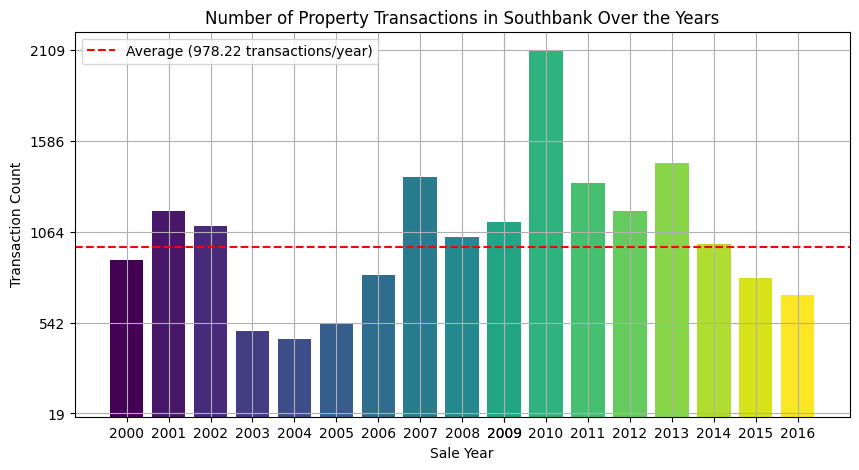

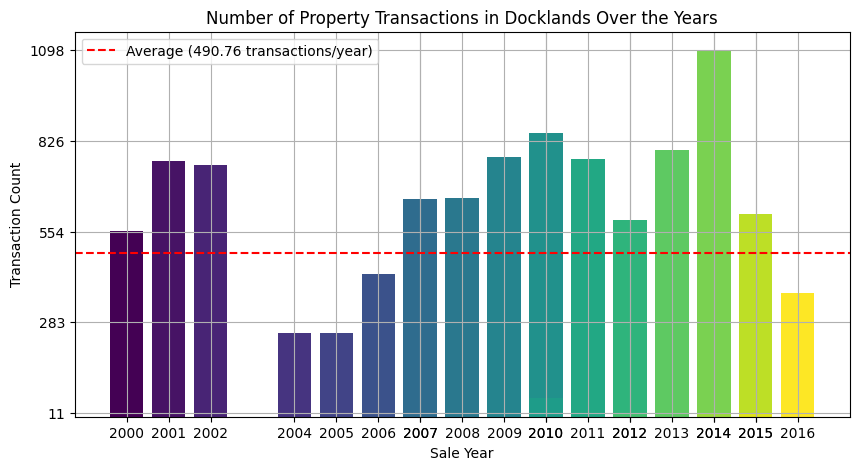

In [225]:

for suburb_name in unique_Small_Areas:
    # Selecting dataset for the current suburb and sort it by 'Sale_Year'
    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    plt.figure(figsize=(10, 5))

    # Plotting Transaction_Count against Sale_Year
    plt.bar(dataset['Sale_Year'], dataset['Transaction_Count'],  color=plt.cm.viridis(np.linspace(0, 1, len(dataset))))

    # Calculating the average transaction count for the current suburb
    average_transaction_count = dataset['Transaction_Count'].mean()

    # Adding a horizontal line for the average transaction count
    plt.axhline(y=average_transaction_count, color='r', linestyle='--', label=f'Average ({average_transaction_count:.2f} transactions/year)')

    plt.title(f'Number of Property Transactions in {suburb_name} Over the Years')
    plt.xlabel('Sale Year')
    plt.ylabel('Transaction Count')
    plt.grid(True)
    plt.xticks(dataset['Sale_Year'])

    Transaction_Count = dataset['Transaction_Count']
    plt.yticks(np.linspace(Transaction_Count.min(), Transaction_Count.max(), 5))

    plt.legend()
    plt.show()


# Average number of transacions for each Suburb

In [226]:
mean_transaction = {}

# Iterating over each suburb in the unique_Small_Areas list
for suburb_name in unique_Small_Areas:

    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    # Calculating the mean of the 'Transaction_Count' column for each suburb
    sub_mean_transaction = np.mean(dataset['Transaction_Count'])

    mean_transaction [suburb_name] = sub_mean_transaction

# Displaying the median of median prices for each suburb
for suburb_name, mean in mean_transaction.items():
    print(f" Average number of transacions in {suburb_name}: {mean:.2f}")

 Average number of transacions in Carlton: 207.47
 Average number of transacions in East Melbourne: 123.03
 Average number of transacions in Kensington: 172.39
 Average number of transacions in Melbourne (CBD): 1877.18
 Average number of transacions in Melbourne (Remainder): 94.88
 Average number of transacions in North Melbourne: 206.29
 Average number of transacions in Parkville: 70.42
 Average number of transacions in South Yarra: 89.03
 Average number of transacions in West Melbourne (Residential): 104.50
 Average number of transacions in Southbank: 978.22
 Average number of transacions in Docklands: 490.76


# Average Number of Property Transactions in Each Suburb

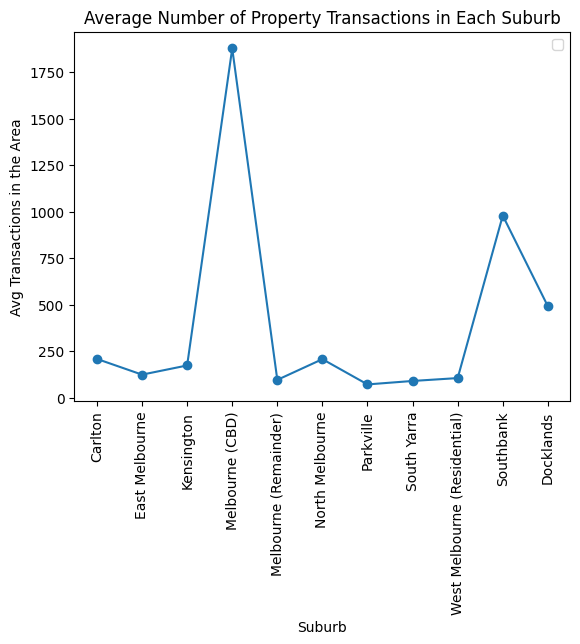

In [227]:
mean_transaction_df = pd.DataFrame({'Suburb': list(mean_transaction.keys()),
                                'Transaction_Count': list(mean_transaction.values())})

# Plotting the Avg Number of Transactions in a Suburb

plt.scatter(mean_transaction_df['Suburb'], mean_transaction_df['Transaction_Count'])
plt.plot(mean_transaction_df['Suburb'], mean_transaction_df['Transaction_Count'], linestyle='-')
plt.title('Average Number of Property Transactions in Each Suburb')
plt.xlabel('Suburb')
plt.ylabel('Avg Transactions in the Area')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Median House Prices in each Suburb over the years

The following part shows us the trends of the Median Property prices over the years for each suburb.

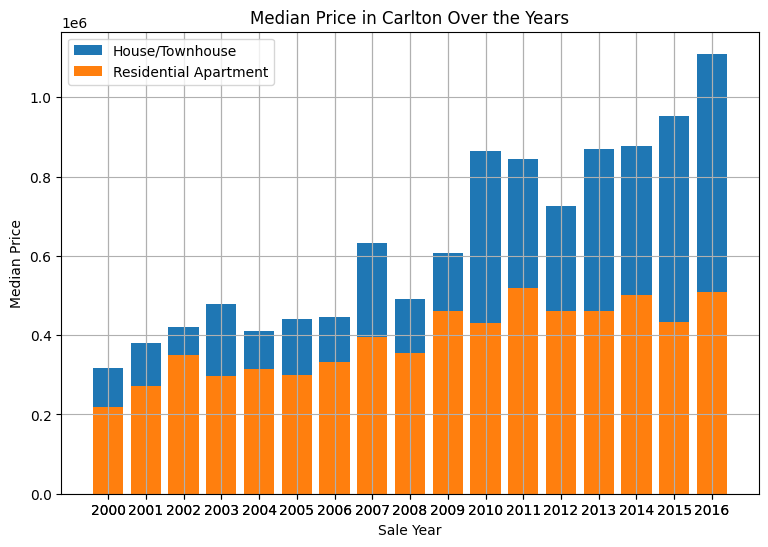

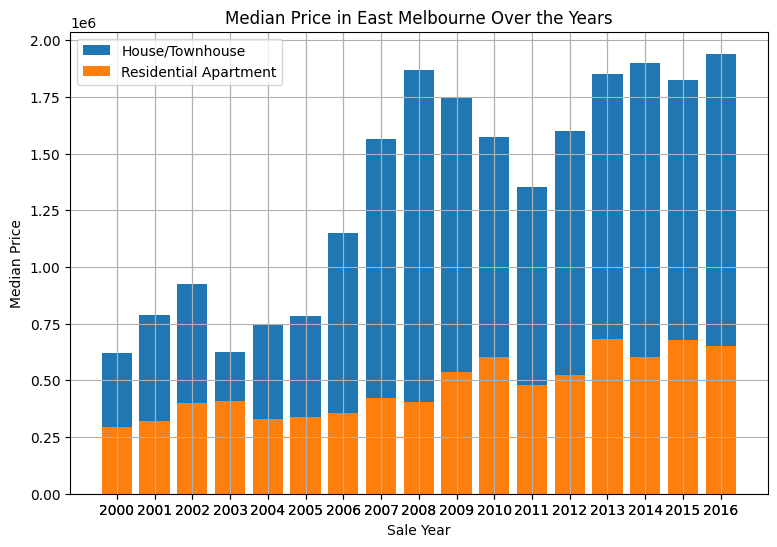

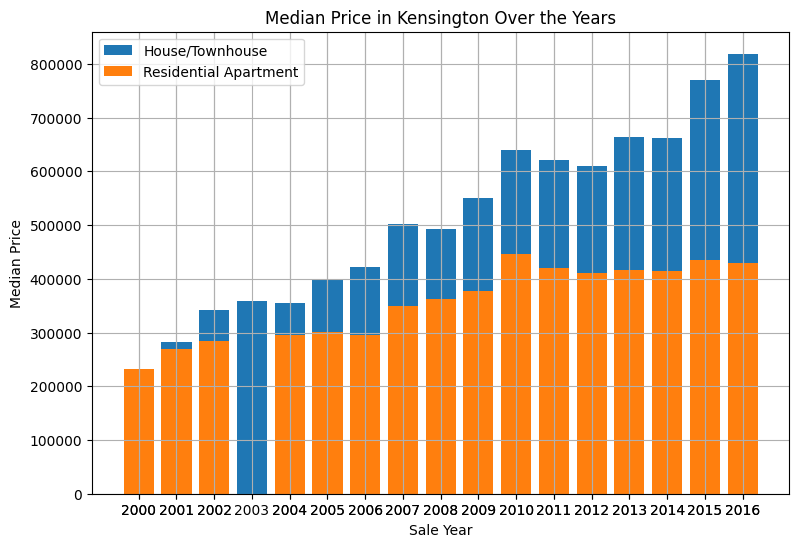

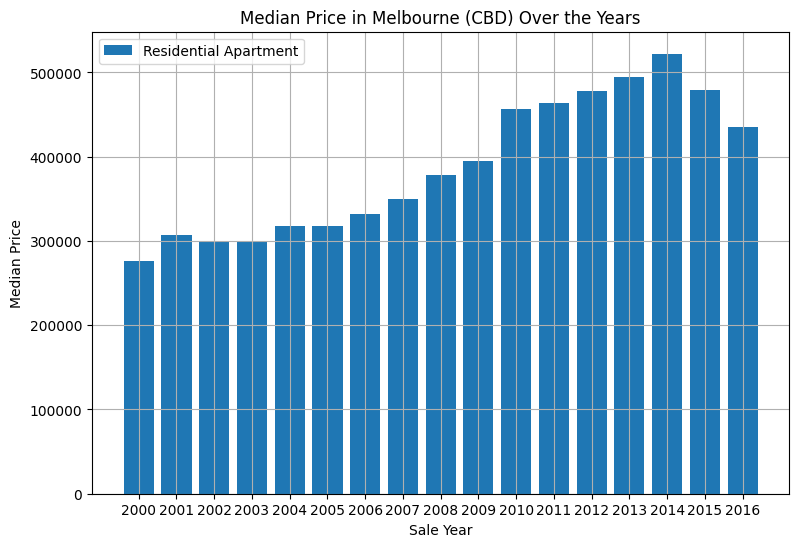

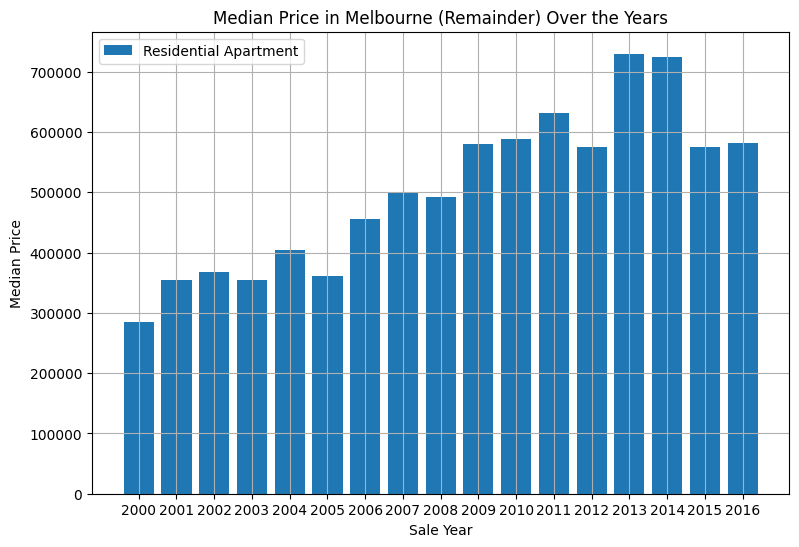

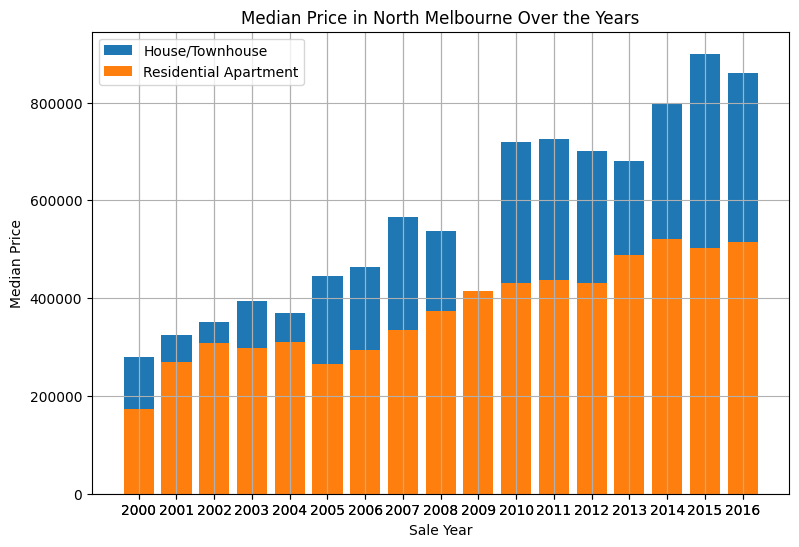

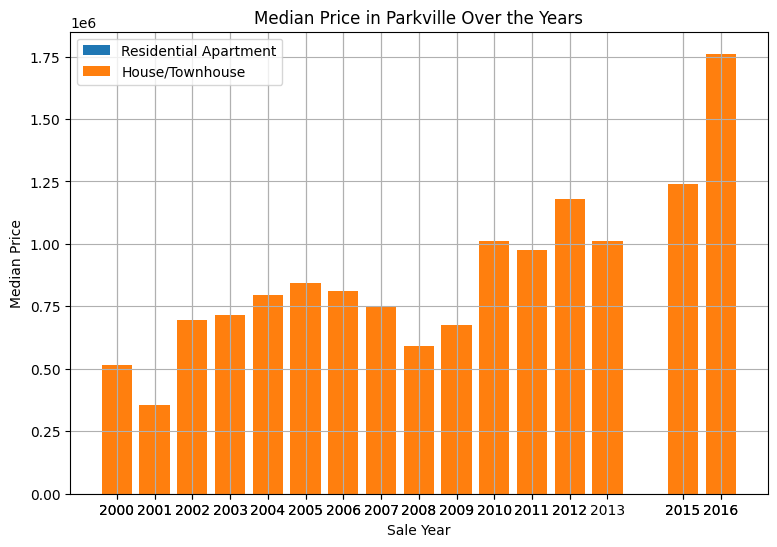

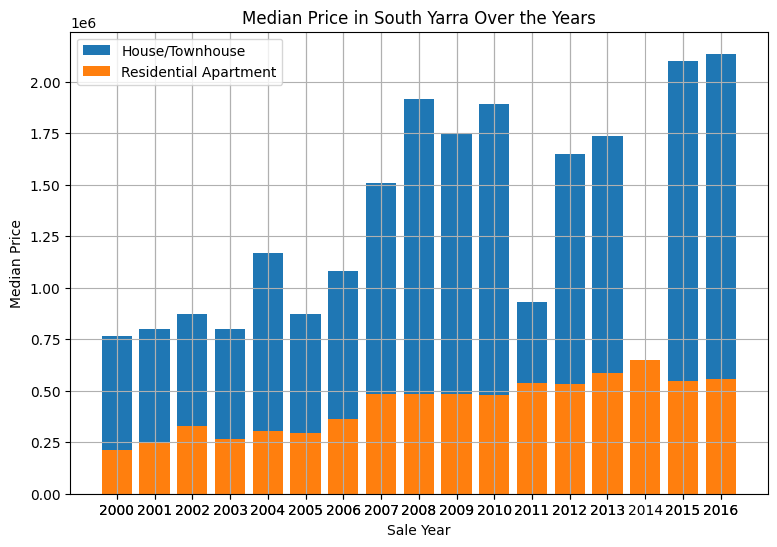

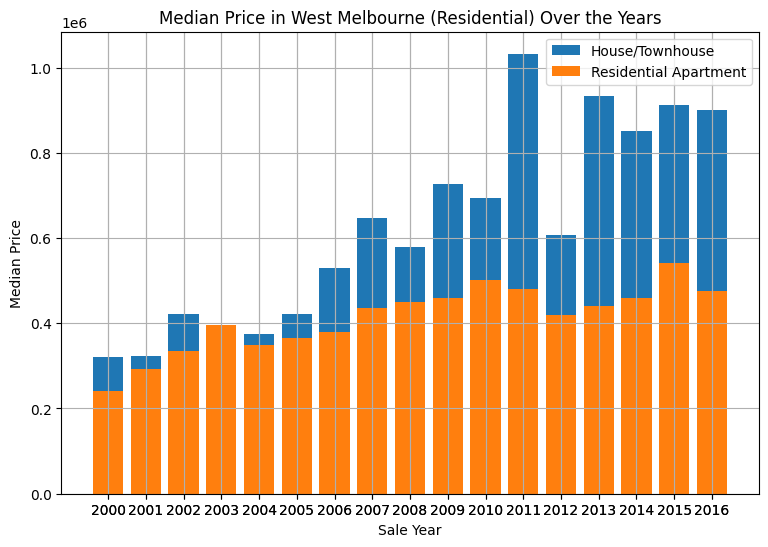

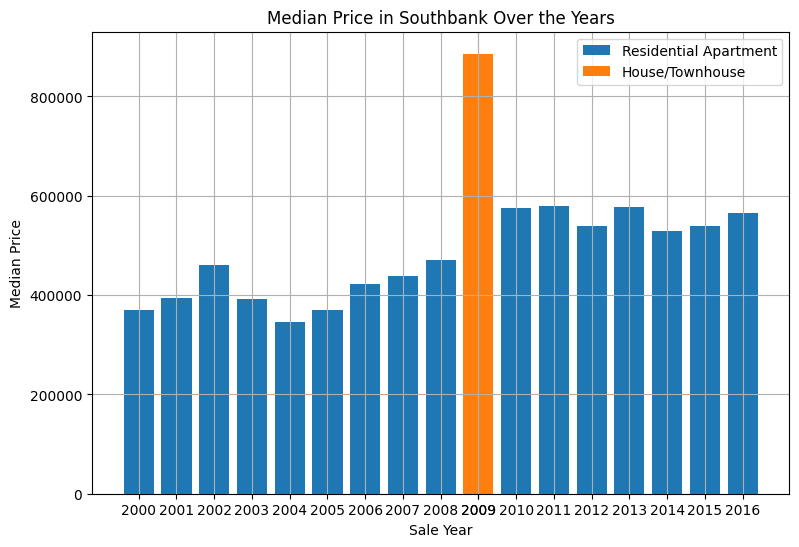

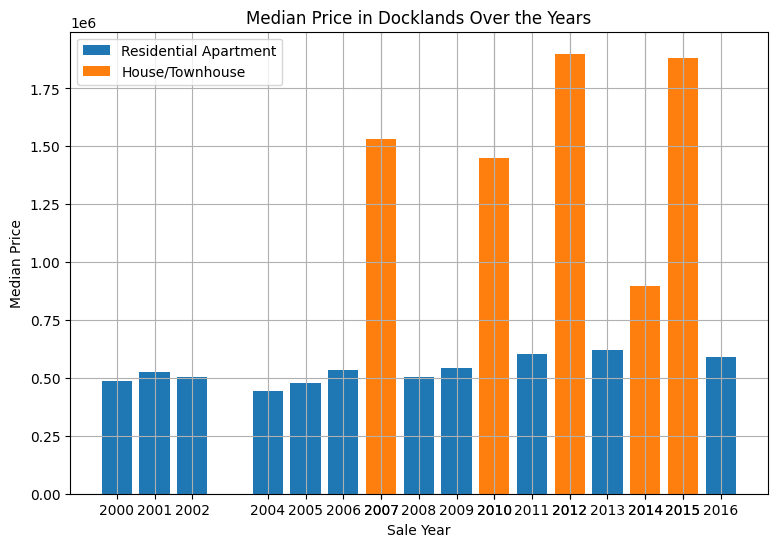

In [228]:
for suburb_name in unique_Small_Areas:

    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    plt.figure(figsize=(9, 6))

    house_Types = dataset['Type'].unique()

    bottom_values = np.zeros(len(dataset))

    # Plotting each house Type
    for i, house_Type in enumerate(house_Types):

        house_data = dataset[dataset['Type'] == house_Type]


        plt.bar(house_data['Sale_Year'], house_data['Median_Price'], label= house_Type)



    plt.title(f'Median Price in {suburb_name} Over the Years')
    plt.xlabel('Sale Year')
    plt.ylabel('Median Price')
    plt.grid(True)
    plt.xticks(dataset['Sale_Year'])


    plt.legend()


    plt.show()


In [259]:
from sklearn.linear_model import LinearRegression
regression_models = {}

# Iterating
for suburb, data in suburb_datasets.items():
    # Extract features (X) and target variable (y)
    X = data[['Sale_Year', 'Transaction_Count']]
    y = data['Median_Price']
    model = LinearRegression()
    model.fit(X, y)
    regression_models[suburb] = model

# Results obtained by fitting a regression model into the housing data

1. **Carlton**: The housing prices in Carlton are experiencing a moderate increase, with a coefficient of $33,087.54.

2. **Docklands**: Docklands shows a similar trend to Carlton, with housing prices increasing at a rate of $25,524.17.

3. **East Melbourne**: Housing prices in East Melbourne are rising significantly, with a coefficient of $45,675.22.

4. **Kensington**: Kensington is experiencing a moderate increase in housing prices, with a coefficient of $24,425.97.

5. **Melbourne (CBD)**: The CBD area of Melbourne shows a relatively lower increase in housing prices, with a coefficient of $12,765.61.

6. **Melbourne (Remainder)**: Similar to the CBD, the remainder of Melbourne shows a moderate increase in housing prices, with a coefficient of $20,100.73.

7. **North Melbourne**: Housing prices in North Melbourne are moderately increasing, with a coefficient of $31,334.58.

8. **Parkville**: Parkville exhibits a significant increase in housing prices, with a coefficient of $37,859.78.

9. **South Yarra**: South Yarra shows a moderate increase in housing prices, with a coefficient of $32,274.16.

10. **Southbank**: Housing prices in Southbank are increasing at a relatively lower rate, with a coefficient of $15,680.43.
11. **West Melbourne (Residential)**: West Melbourne (Residential) is experiencing a moderate increase in housing prices, with a coefficient of $33,115.74.




# Type of Houses for which Property Transactions took place in each Suburbs

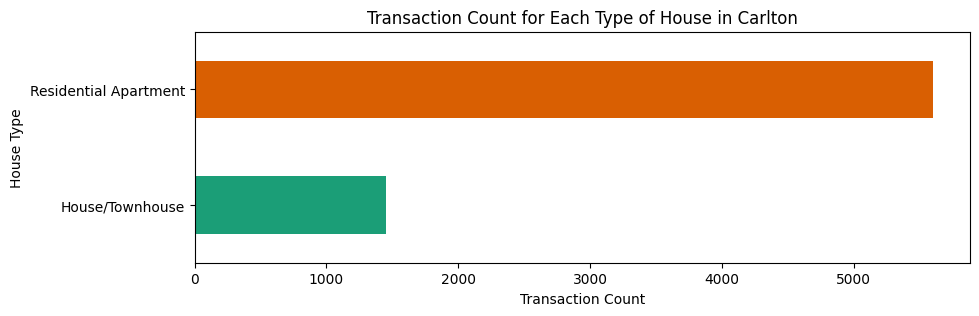

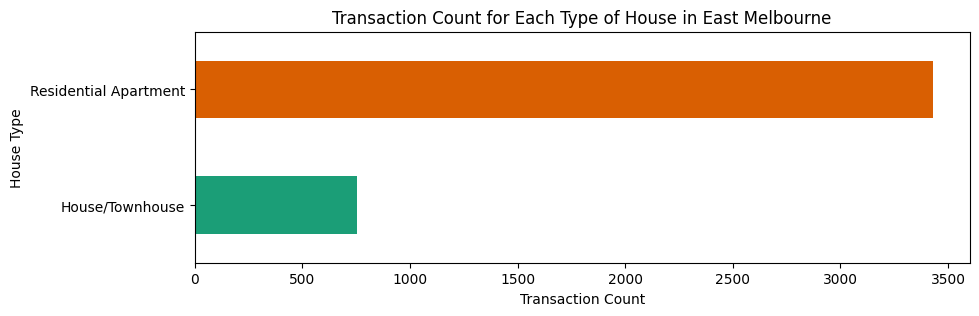

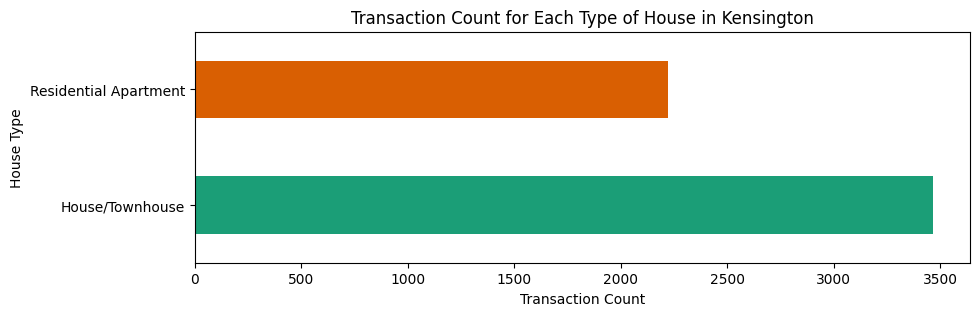

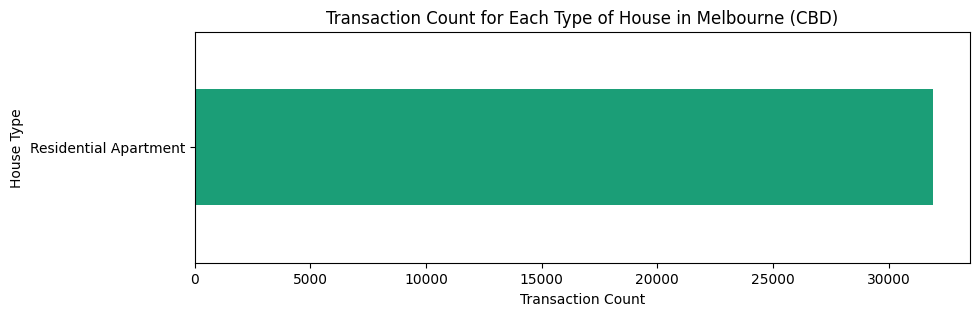

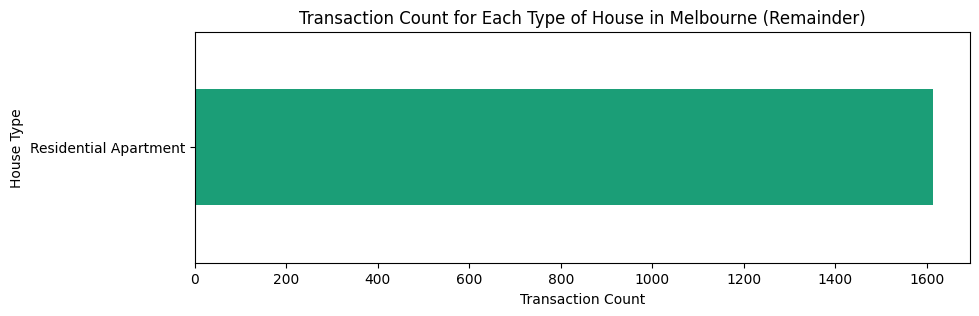

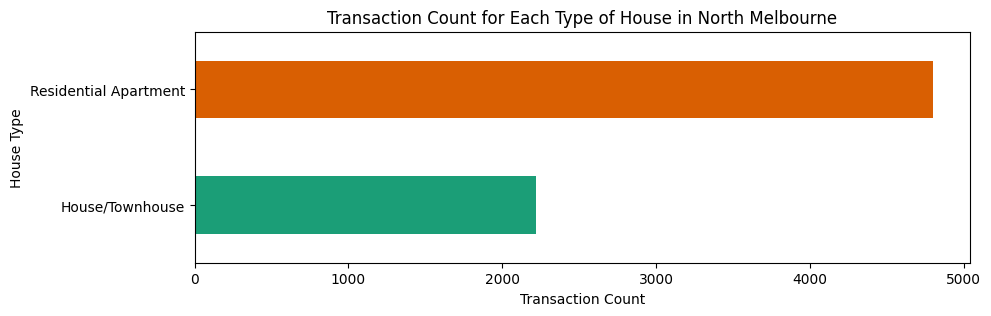

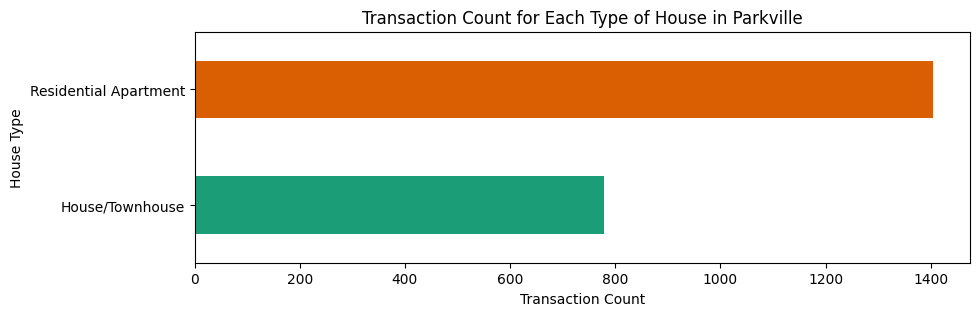

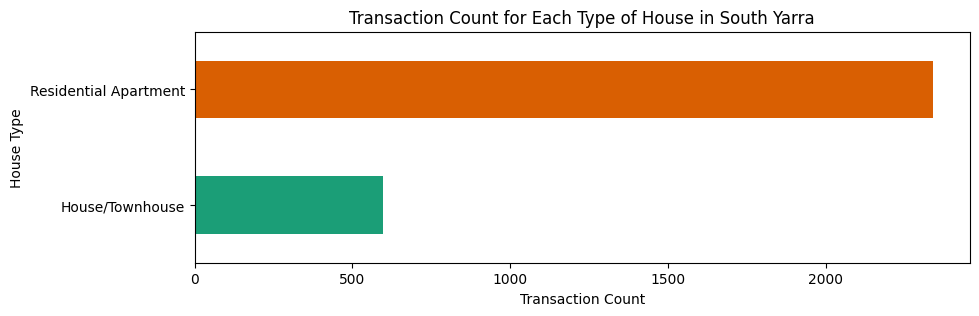

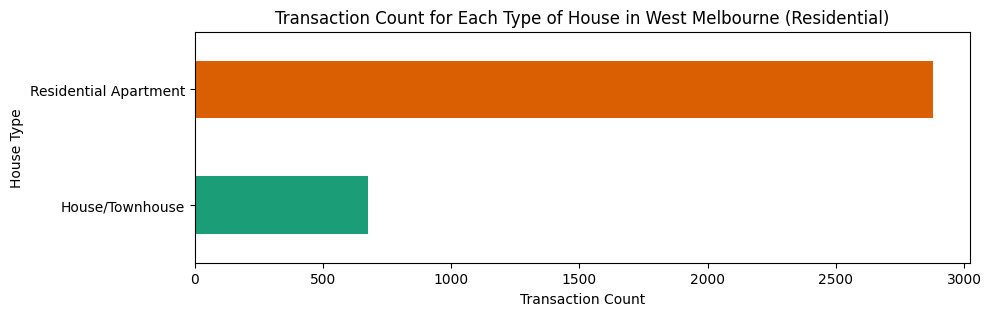

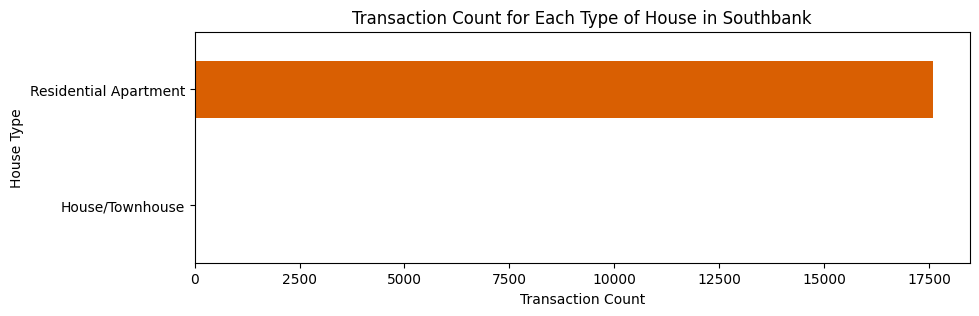

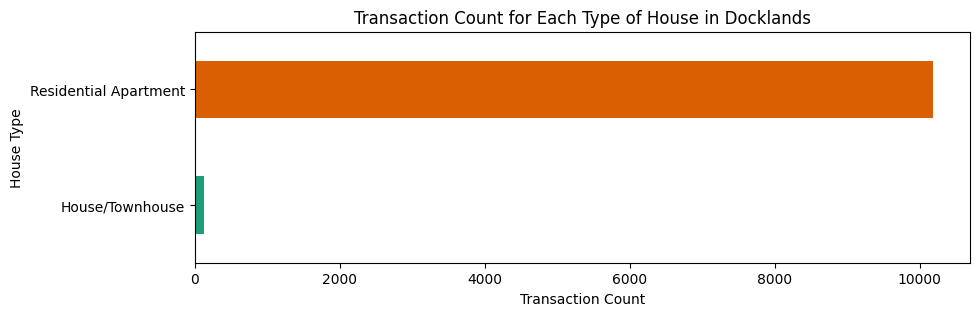

In [229]:
from matplotlib import pyplot as plt
import seaborn as sns



for suburb_name in unique_Small_Areas:
    # Filter the DataFrame for the specific suburb
    suburb_data = housing_price[housing_price['Small_Area'] == suburb_name]
    plt.figure(figsize=(10,3))
    # Group by 'Type' and sum the 'Transaction_Count' for each Type
    suburb_transaction = suburb_data.groupby('Type')['Transaction_Count'].sum()

    # Plot the transaction count for each Type of house as a horizontal bar plot
    suburb_transaction.plot(kind='barh', color=sns.color_palette('Dark2'))

    # Set the title and labels

    plt.title(f'Transaction Count for Each Type of House in {suburb_name}')
    plt.xlabel('Transaction Count')
    plt.ylabel('House Type')

    # Show the plot
    plt.show()


# Type of Houses for which Property Transactions took place in each Suburbs over the years

In [230]:
import plotly.graph_objects as go

# Iterate over unique_Small_Areas
for suburb_name in unique_Small_Areas:
    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    fig = go.Figure()

    for house_Type in house_Types:
        # Filtering dataset for house Type
        house_data = dataset[dataset['Type'] == house_Type]

        # Add a trace for the current house Type
        fig.add_trace(go.Bar(x=house_data['Sale_Year'], y=house_data['Transaction_Count'], name=house_Type))

    # Update layout
    fig.update_layout(title=f'Transaction Count in {suburb_name} Over the Years',
                      xaxis_title='Sale Year',
                      yaxis_title='Transaction count')

    # Show the plot for the current suburb
    fig.show()




---


# Loading the [Landmarks and Places of interest](https://https://data.melbourne.vic.gov.au/explore/dataset/landmarks-and-places-of-interest-including-schools-theatres-health-services-spor/table/) Dataset

In [231]:
# Function to get data from website using API
def get_data(base, data_url, offset=0):
    # Set the filters, limit retrieves 20 rows at a time, offset says where to start data collection
    filters = f'records?limit={50}&offset={offset}&timezone=UTC'
    # Make the url from base, data url and filters variables stored ouside loop
    url = f'{base}{data_url}/{filters}'
    # Use the requests function to get the data
    result = requests.get(url)
    # Check that the request works, error code 200 = successful
    if result.status_code == 200:
        # Save results as a json file
        result_json = result.json()
        # Store a variable of max_results with total of dataset
        max_results = result_json['total_count']
        # Save the results key data to a list variable
        records = result_json['results']
    else:
        # If data is not collected correctly return the error
        print("ERROR GETTING DATA: ", result.status_code)
        max_results = 0
        records = []
    # At end of function, return the json results in records, max_results count and offset
    return [records, max_results, offset]



# Collect data from API
# Set offset increment
# (needs to match offset in get data function)
OFFSET_INCREMENT = 50
# Base url (this should be the same for all datasets)
BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# Set specific url
# (change this variable for the dataset you are working with)
SPECIFIC_PATH = 'landmarks-and-places-of-interest-including-schools-theatres-health-services-spor'
# Call the get data function, passing in variables above, save to result
result = get_data(BASE_URL, SPECIFIC_PATH)
# Save the records data returned in the get_data function to records list variable
records = result[0]
# Save the dataset size data returned in the get_data function to max_results variable
max_results = result[1]
# Increase the offset returned in the get_data function (result[2]) by the offset increment
offset = result[2] + OFFSET_INCREMENT
# Check the length of the data returned and compare it against the max_results variable
# If the length o fthe data is less than the max_results, run the while loop
while len(records) != max_results:
    # Call the get data function again, passing in url, specific path and new offset value
    data = get_data(BASE_URL, SPECIFIC_PATH, offset)
    # Add the data collected to the existing records list
    records += data[0]
    # Increase the offset by the offset increment
    offset += OFFSET_INCREMENT
# Convert the records list of dictionaries into a pandas dataframe
lndmvrks = pd.DataFrame(records)
# Print the dataframe
lndmvrks.head()


,theme,sub_theme,feature_name,co_ordinates
0,Transport,Railway Station,Flemington Bridge Railway Station,"{'lon': 144.939277838304, 'lat': -37.788164588..."
1,Mixed Use,Retail/Office/Carpark,Council House 2 (CH2),"{'lon': 144.966638432727, 'lat': -37.814259143..."
2,Leisure/Recreation,Informal Outdoor Facility (Park/Garden/Reserve),Carlton Gardens South,"{'lon': 144.971266479841, 'lat': -37.806068457..."
3,Place of Worship,Church,Wesley Church,"{'lon': 144.968168215633, 'lat': -37.810157644..."
4,Place of Worship,Church,St Augustines Church,"{'lon': 144.954862000132, 'lat': -37.816974135..."


In [232]:

lndmvrks = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/landmarks-and-places-of-interest-including-schools-theatres-health-services-spor/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C")


# Classification of Landmarks and Places of Interests

**In the following sections we classify and visualise the Landmarks and Places of Interests on the basis of Type based on 'Theme' column.**

In [233]:
theme_counts = lndmvrks['Theme'].value_counts()
print( theme_counts)



Theme
Leisure/Recreation                      63
Place Of Assembly                       40
Place of Worship                        31
Transport                               26
Community Use                           21
Education Centre                        13
Mixed Use                               11
Health Services                         11
Office                                  11
Purpose Built                            4
Vacant Land                              3
Retail                                   3
Residential Accommodation                2
Warehouse/Store                          1
Specialist Residential Accommodation     1
Industrial                               1
Name: count, dtype: int64


In [234]:
# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=theme_counts.index, values=theme_counts, textinfo='percent', hole=0.3)])

# Update layout
fig.update_layout(title='Distribution of Themes in Landmarks',
                  legend_title='Themes',
                  legend=dict(orientation='v', yanchor='top', y=1.0, xanchor='right', x=1.25),
                  margin=dict(l=20, r=20, t=40, b=20))

fig.show()


# Creating subplots for each theme

**Creating subplots for each Type of landmark in order to show the sub Types of landmarks and places of interests.**

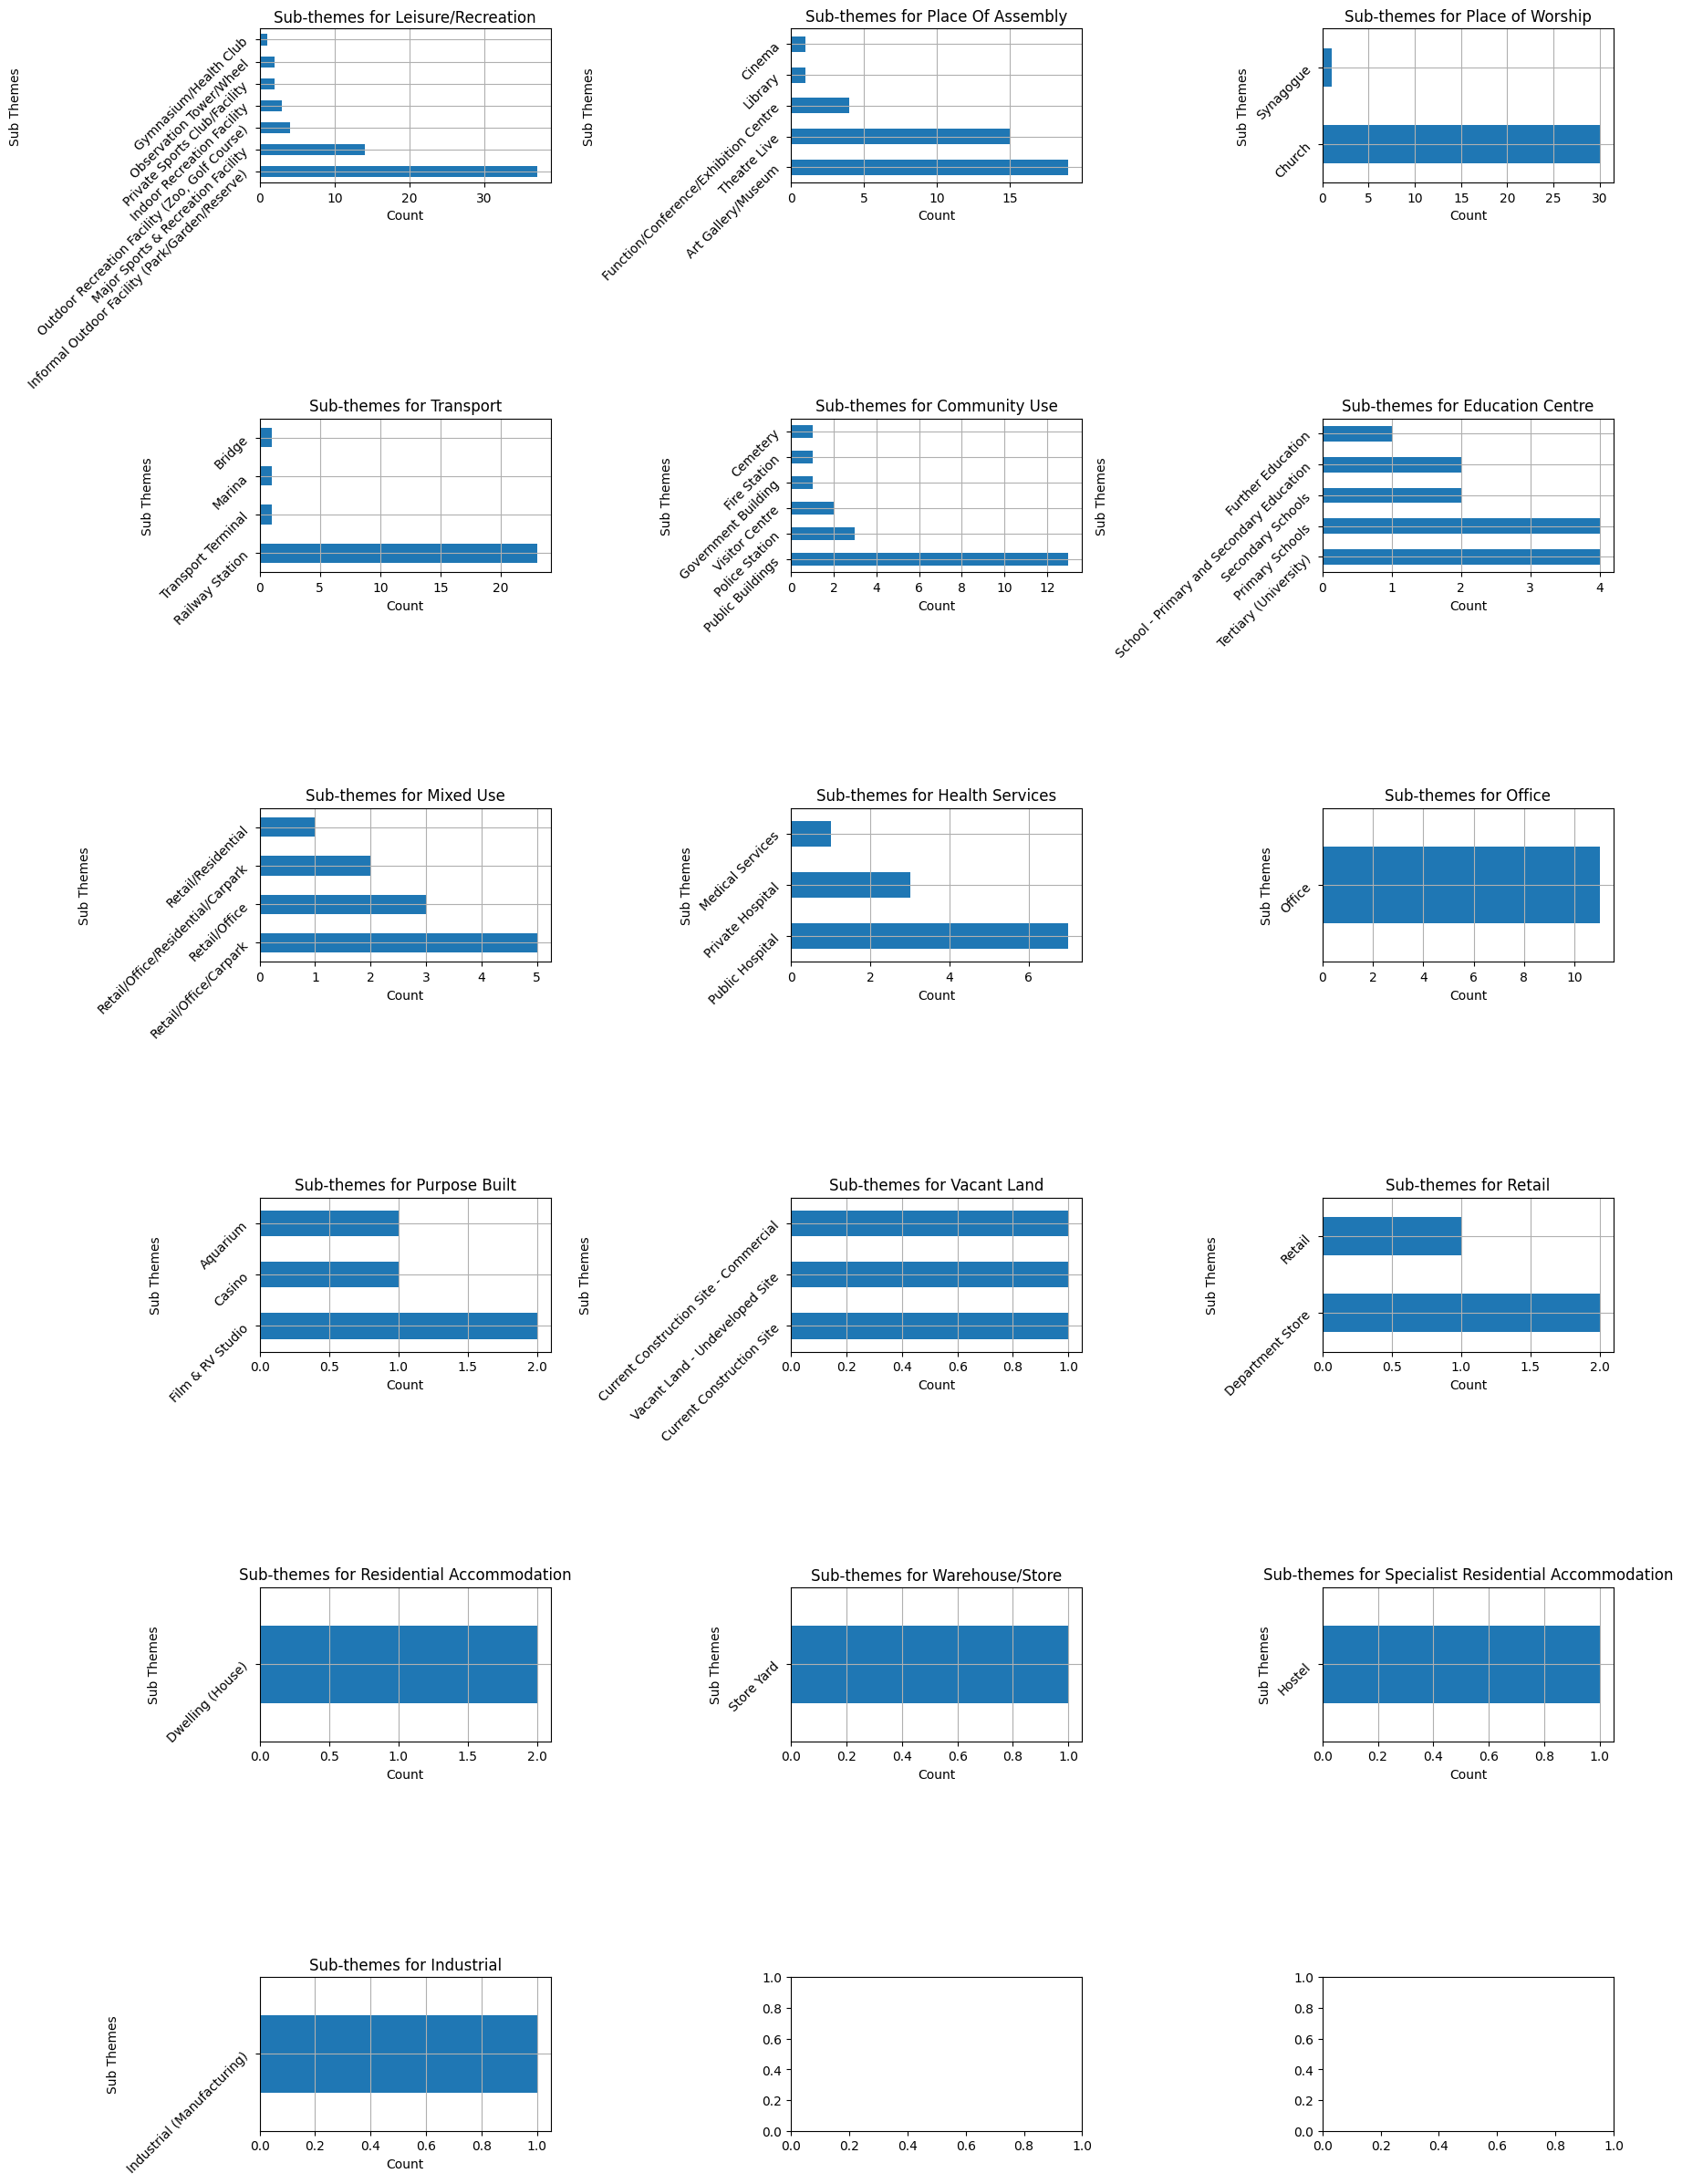

In [235]:
import matplotlib.pyplot as plt

# Get the theme counts
theme_counts = lndmvrks['Theme'].value_counts()

num_themes = len(theme_counts)
num_cols = 3  # Maximum number of columns per row
num_rows = (num_themes + num_cols - 1) // num_cols

# Creating subplots for each theme
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows*4))

for i, theme in enumerate(theme_counts.index):
    theme_df = lndmvrks[lndmvrks['Theme'] == theme]

    # Count occurrences of sub-themes
    sub_theme_counts = theme_df['Sub Theme'].value_counts()

    # Plot the sub-themes
    ax = axes[i//num_cols, i%num_cols]  # Calculate subplot index
    sub_theme_counts.plot(kind='barh', ax=ax)
    ax.set_title(f'Sub-themes for {theme}')
    ax.set_xlabel('Count')
    ax.set_ylabel('Sub Themes')
    ax.tick_params(axis='y', rotation=45)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()








---

# Mapping Landmarks and Places of Interests

In [236]:


# Converting coordinates
lndmvrks['Latitude'] = [float(coord.split(',')[0]) for coord in lndmvrks['Co-ordinates']]
lndmvrks['Longitude'] = [float(coord.split(',')[1]) for coord in lndmvrks['Co-ordinates']]

# Creating a map
map_center = [lndmvrks['Latitude'].mean(), lndmvrks['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for each coordinate
for i in range(len(lndmvrks)):
    folium.Marker(
        location=[lndmvrks['Latitude'][i], lndmvrks['Longitude'][i]],
        popup='Landmark Name: {}'.format(lndmvrks['Feature Name'][i])
    ).add_to(mymap)

# Save the map as an HTML file
mymap


# Map Showing the Suburb Regions and Landmarks


**Mapping out suburb regions from the Small-Areas-for-Census-of -Landuse dataset. The suburb regions are given as a set of co-ordinate points which need to be mapped out in order to represent the suburb.**

In [237]:
suburbs_data = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/small-areas-for-census-of-land-use-and-employment-clue/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C")

In [241]:
import geopandas as gpd

url = 'https://github.com/yashdawaree/Capstone/raw/main/small-areas-for-census-of-land-use-and-employment-clue.geojson'
gdf = gpd.read_file(url)


gdf.rename(columns={'featurenam': 'suburb'}, inplace=True)

print("Small Areas for Census of Land Use and Employment (CLUE) Dataset: \n")
gdf.head()

Small Areas for Census of Land Use and Employment (CLUE) Dataset: 



,geo_point_2d,suburb,shape_area,shape_len,geometry
0,"{'lon': 144.9204996881507, 'lat': -37.79152998...",Kensington,3808797.49677,9407.05542058,"MULTIPOLYGON (((144.93687 -37.78884, 144.93667..."
1,"{'lon': 144.94942867521925, 'lat': -37.8084601...",West Melbourne (Residential),860054.675679,4031.46799307,"MULTIPOLYGON (((144.95144 -37.81317, 144.95033..."
2,"{'lon': 144.96291513859617, 'lat': -37.8138110...",Melbourne (CBD),2485904.89194,7112.60987105,"MULTIPOLYGON (((144.95144 -37.81317, 144.95392..."
3,"{'lon': 144.97838992382978, 'lat': -37.8287640...",Melbourne (Remainder),2668300.95898,11399.6082458,"MULTIPOLYGON (((144.98502 -37.84568, 144.98420..."
4,"{'lon': 144.9515603312268, 'lat': -37.78711656...",Parkville,4050997.2362,9224.56939673,"MULTIPOLYGON (((144.94037 -37.78762, 144.94007..."


In [256]:

# Loading GeoJSON file
geojson_file = "small-areas-for-census-of-land-use-and-employment-clue.geojson"
gdf = gpd.read_file(geojson_file)



In [257]:
gdf.rename(columns={'featurenam': 'suburb'}, inplace=True)

# Identifing the suburbs in which the Landmarks and places of interests are located

**Using the co-ordinate location of Landmarks and Places of interests to map them overlaying with the suburbs.**

In [242]:
import geopandas as gpd
import folium

# Creating a map for the suburbs
map_center = [gdf['geometry'].centroid.y.mean(), gdf['geometry'].centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=14)
color= 'blue'
for idx, feature in gdf.iterrows():

    # Extracting suburb name
    feature_name = feature['suburb']

    popup_content = f'<b style="font-size: 16px">{feature_name}</b>'
    folium.GeoJson(
        feature['geometry'],
        style_function=lambda x: {'fillColor': color, 'color': color},
          popup=folium.Popup(popup_content, max_width=300),
    ).add_to(mymap)

# Adding locations of Landmarks and Places of Interest
for i in range(len(lndmvrks)):
    folium.Marker(
        location=[lndmvrks['Latitude'][i], lndmvrks['Longitude'][i]],
        popup='Landmark Name: {}'.format(lndmvrks['Feature Name'][i]),
        icon=folium.Icon(color='red')
    ).add_to(mymap)

# Display the map
mymap


In [243]:

from geopy.distance import geodesic


# extracting coordinates from Geo Point column
def extract_coordinates(geo_point):
    # Geo Point is in format "latitude, longitude"
    lat, lon = map(float, geo_point.split(','))
    return lat, lon

# Function to calculate distance between two points
def calculate_distance(landmark_coords, suburb_coords):
    return geodesic(landmark_coords, suburb_coords).kilometers

# List to store the suburb for each landmark
lmk_suburbs = []

# Iterate over each landmark
for landmark_coords in lndmvrks['Co-ordinates']:
    # Initialize variables to store minimum distance and corresponding suburb
    min_distance = float('inf')
    closest_suburb = None

    # Iterate over each suburb
    for index, suburb_data in suburbs_data.iterrows():
        suburb_coords = extract_coordinates(suburb_data['Geo Point'])

        # Calculating distance between landmark and suburb
        distance = calculate_distance(landmark_coords, suburb_coords)

        if distance < min_distance:
            min_distance = distance
            closest_suburb = suburb_data['featurenam']


    lmk_suburbs.append(closest_suburb)

# Adding the suburb information to the lndmvrks
lndmvrks['suburb'] = lmk_suburbs

sub_lmrks = lndmvrks.drop(columns=['Co-ordinates'], inplace=True)

lndmvrks.head()


,Theme,Sub Theme,Feature Name,Latitude,Longitude,suburb
0,Transport,Railway Station,Flemington Bridge Railway Station,-37.788165,144.939278,Parkville
1,Mixed Use,Retail/Office/Carpark,Council House 2 (CH2),-37.814259,144.966638,Melbourne (CBD)
2,Leisure/Recreation,Informal Outdoor Facility (Park/Garden/Reserve),Carlton Gardens South,-37.806068,144.971266,Melbourne (CBD)
3,Place of Worship,Church,Wesley Church,-37.810158,144.968168,Melbourne (CBD)
4,Place of Worship,Church,St Augustines Church,-37.816974,144.954862,Melbourne (CBD)


# Count and Type of Landmarks in each Suburb

**Landmarks by Sub Theme**

Classifying landmarks into various Types based on the 'theme' and sub Types nased on the 'sub theme' columns from the Landmarks and Places of Interests Datasets.

In [249]:
import plotly.graph_objects as go
import pandas as pd

# Group by 'suburb' and 'Theme'
landmark_counts_by_Type = lndmvrks.groupby(['suburb', 'Theme']).size().unstack(fill_value=0)

# Create traces for each theme
data = []
for theme in landmark_counts_by_Type.columns:
    data.append(go.Bar(
        x=landmark_counts_by_Type.index,
        y=landmark_counts_by_Type[theme],
        name=theme
    ))

# Layout
layout = go.Layout(
    title='Total Number of Landmarks by Type for Each Suburb',
    xaxis=dict(title='Suburb'),
    yaxis=dict(title='Number of Landmarks'),
    barmode='stack',
    xaxis_tickangle=-45
)

# Create figure
fig = go.Figure(data=data, layout=layout)

fig.show()


**Categorising the landmarks from the Landmarks and Places of Interest dataset into Suburbs using spatial data.**

In [244]:
# Grouping "suburb" column and count the number of landmarks in each area
landmark_counts = lndmvrks.groupby('suburb')['Feature Name'].size()

landmark_counts_df = landmark_counts.reset_index()
landmark_counts_df.columns = ['suburb', 'Landmark_Count']
Suburb_data_with_landmarks = pd.merge(gdf, landmark_counts_df, on='suburb', how='left')

Suburb_data_with_landmarks.rename(columns={'Shape_area': 'Suburb_Area'}, inplace=True)

# Selecting only the desired columns
landmarks_in_suburb = Suburb_data_with_landmarks[['suburb', 'shape_area', 'Landmark_Count']].sort_values(by='Landmark_Count', ascending=False)


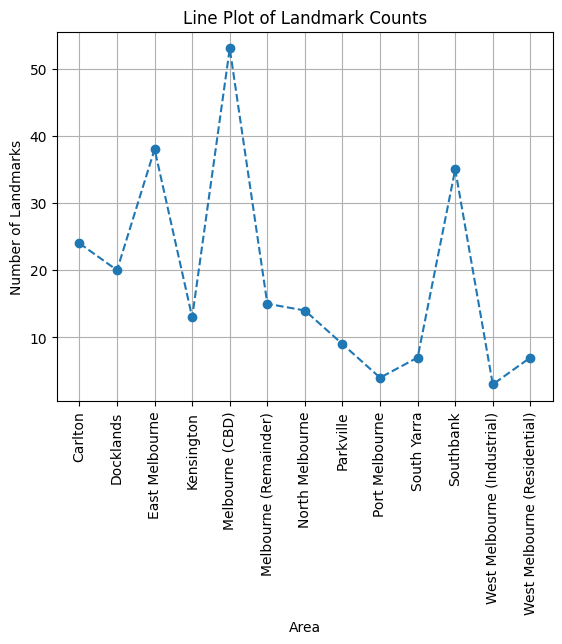

In [248]:
# Create a line plot
plt.plot(landmark_counts.index, landmark_counts, marker='o', linestyle='--')

# Add labels and title
plt.xlabel('Area')
plt.ylabel('Number of Landmarks')
plt.title('Line Plot of Landmark Counts')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.grid(True)
plt.show()



# Landmark Density

In [251]:
landmarks_in_suburb['shape_area'] = landmarks_in_suburb['shape_area'].astype(float)

# Converting values in 'shape_area' sqkm
landmarks_in_suburb['shape_area'] /= 1e+6

# Dividing values from 'Landmark_Count' by  values from 'shape_area'
landmarks_in_suburb['Landmark_Density'] = landmarks_in_suburb['Landmark_Count'] / landmarks_in_suburb['shape_area']
landmarks_in_suburb['Landmark_Density'] = landmarks_in_suburb['Landmark_Density'].round(1)

print(landmarks_in_suburb)


                          suburb  shape_area  Landmark_Count  Landmark_Density
2                Melbourne (CBD)    2.485905              53              21.3
7                 East Melbourne    1.909073              38              19.9
5                      Southbank    1.596010              35              21.9
10                       Carlton    2.724821              24               8.8
9                      Docklands    2.856029              20               7.0
3          Melbourne (Remainder)    2.668301              15               5.6
11               North Melbourne    2.408377              14               5.8
0                     Kensington    3.808797              13               3.4
4                      Parkville    4.050997               9               2.2
1   West Melbourne (Residential)    0.860055               7               8.1
6                    South Yarra    1.057773               7               6.6
12                Port Melbourne    5.470093        

**Landmark Desity** column gives us the value for number of Landmarks per Square kilometer. The Suburbs with hgher value of Landmark Density indicate that the suburbs have more landmarks and places of interest given the size of data.

The following plot shows us the Landmark Density accross each suburb, this helps us understand which suburbs have a higher concentration of suburbs per square kilometer.

In [252]:

# Creating interactive histogram
fig = px.histogram(landmarks_in_suburb, x='Landmark_Density', y='suburb', title='Landmark Density in Suburbs',
                   labels={'Landmark_Density': 'Landmark Density', 'suburb': 'Suburb'})


fig.show()


# Most common Places of Interest/ Landmarks in each Suburb


**In the following section we will use data from the lndmvrks dataset where we ave categorised each landmark into the suburb it belongs by spatial analysis. For each suburb, we will find out the most common Type of landmarks and count the number of Type the most common Type of landmark appears in that suburb.**

In [253]:

# Grouping by 'suburb' and 'Theme'
grouped = lndmvrks.groupby(['suburb', 'Theme']).size().reset_index(name='count')

# maximum count for each suburb
idx = grouped.groupby(['suburb'])['count'].transform(max) == grouped['count']

# Filtering the  to get the maximum count for each suburb
most_common_landmarks_df = grouped[idx]

most_common_landmarks_df.columns = ['suburb', 'most_common_landmark', 'landmark_count']

print(most_common_landmarks_df)




                          suburb most_common_landmark  landmark_count
3                        Carlton   Leisure/Recreation               8
7                      Docklands   Leisure/Recreation               7
16                East Melbourne   Leisure/Recreation              10
24                    Kensington   Leisure/Recreation               5
26                    Kensington            Transport               5
32               Melbourne (CBD)    Place Of Assembly              12
38         Melbourne (Remainder)   Leisure/Recreation               9
44               North Melbourne   Leisure/Recreation               3
46               North Melbourne     Place of Worship               3
48                     Parkville   Leisure/Recreation               7
51                Port Melbourne   Leisure/Recreation               2
57                   South Yarra     Place of Worship               3
63                     Southbank    Place Of Assembly              12
66   West Melbourne 

In [254]:
import plotly.graph_objects as go

# Creating a bar plot
fig = go.Figure(data=[go.Bar(
    x=most_common_landmarks_df['suburb'],
    y=most_common_landmarks_df['landmark_count'],
    text=most_common_landmarks_df['most_common_landmark'],


)])

# Update layout
fig.update_layout(
    xaxis=dict(title='Suburb'),
    yaxis=dict(title='Most Common Theme Count'),
    title='Most Common Theme Count for Each Suburb',
    xaxis_tickangle=-45,  # Rotate x-axis labels
    barmode='group',  # Choose the mode of the bars
)

fig.show()


**In the above plot we can obsereve some of the suburbs have a stacked bar plot, this is due to the fact that these suburbs have two or more Types of landmarks that are tied for being the most common Type of landmark in the suburb.**


# Landmarks in Each Suburb

**In the section below, we have made a filter which can provide information about any given suburb and the Type of landmarks it contains. Users can specify the Type of landmarks and the Type of suburbs to obtain a count of the number of landmarks of a specified Type exist within a specific suburb, further it also shows the distribution of the specified landmark Type into its various sub Types.**

In [255]:
#defining a function
def plot_subthemes_by_theme_and_suburb(data):
    suburb = input("Enter the name of the suburb: ")
    theme = input("Enter the name of the theme: ")

    filtered_data = data[(data['suburb'] == suburb) & (data['Theme'] == theme)]

    if filtered_data.empty:
        print("No data found for the specified suburb and theme.")
    else:
        subtheme_counts = filtered_data['Sub Theme'].value_counts().reset_index()
        subtheme_counts.columns = ['Sub Theme', 'Count']

        total_theme_counts = len(filtered_data)

                # Printing total number of theme counts
        print(f"\033[1m\n Total number of {theme} counts in {suburb}: {total_theme_counts}\033[0m")



        # Plotting
        fig = px.bar(subtheme_counts, x='Sub Theme', y='Count',
                     title=f'Subtheme Counts for {theme} in {suburb}',
                     labels={'Subtheme': 'Subtheme', 'Count': 'Count'})
        fig.update_layout(xaxis_tickangle=-45, xaxis_title=None, yaxis_title='Count')
        fig.show()



# Example usage:
plot_subthemes_by_theme_and_suburb(lndmvrks)



Enter the name of the suburb: Carlton
Enter the name of the theme: Leisure/Recreation

 Total number of Leisure/Recreation counts in Carlton: 8
